In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
from BHDVCS_tf_modified import *
import matplotlib.pyplot as plt

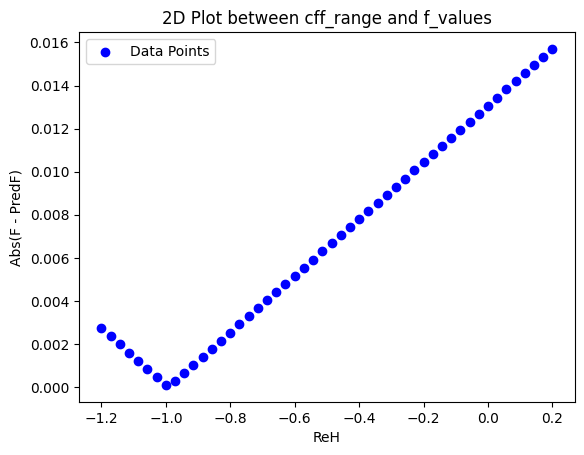

In [96]:
cff_range = np.linspace(-1.2, 0.2, 50)
f_values = []
bhdvcstf = BHDVCStf() 
for cff in cff_range:
    params = tf.cast([[cff, -0.31, -0.396272489, 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_values.append(abs(0.120053172 - f_value))

# Create a scatter plot
plt.scatter(cff_range, f_values, c='blue', label='Data Points')
plt.title('2D Plot between cff_range and f_values')
plt.xlabel('ReH')
plt.ylabel('Abs(F - PredF)')
plt.legend()
plt.show()

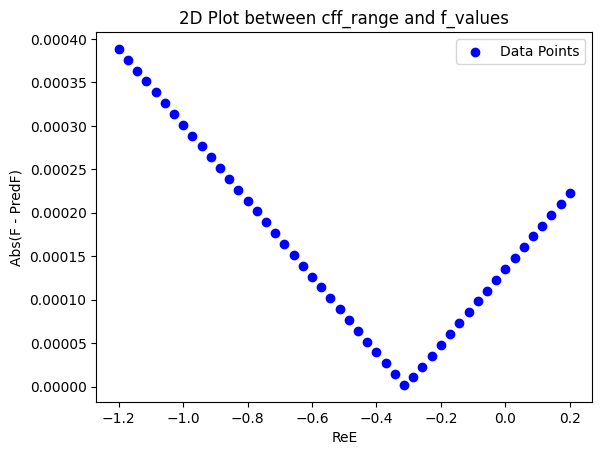

In [97]:
cff_range = np.linspace(-1.2, 0.2, 50)
f_values = []
bhdvcstf = BHDVCStf() 
for cff in cff_range:
    params = tf.cast([[-0.992404142310346, cff, -0.396272489, 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_values.append(abs(0.120053172 - f_value))

# Create a scatter plot
plt.scatter(cff_range, f_values, c='blue', label='Data Points')
plt.title('2D Plot between cff_range and f_values')
plt.xlabel('ReE')
plt.ylabel('Abs(F - PredF)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


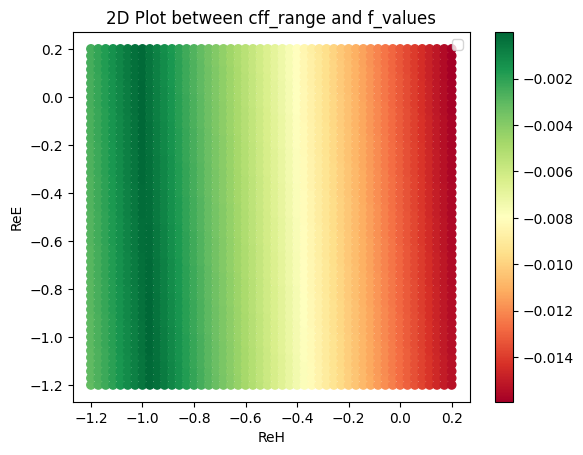

In [98]:
cff_range = np.linspace(-1.2, 0.2, 50)
grid = np.meshgrid(cff_range, cff_range)

reh, ree = grid
reh = reh.flatten()
ree = ree.flatten()

f_values = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], -0.396272489, 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_values.append(-1 * abs(0.120053172 - f_value))

# Create a scatter plot
sc = plt.scatter(reh, ree, c=f_values, cmap = 'RdYlGn')
plt.colorbar(sc)
plt.title('2D Plot between cff_range and f_values')
plt.xlabel('ReH')
plt.ylabel('ReE')
plt.legend()
plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


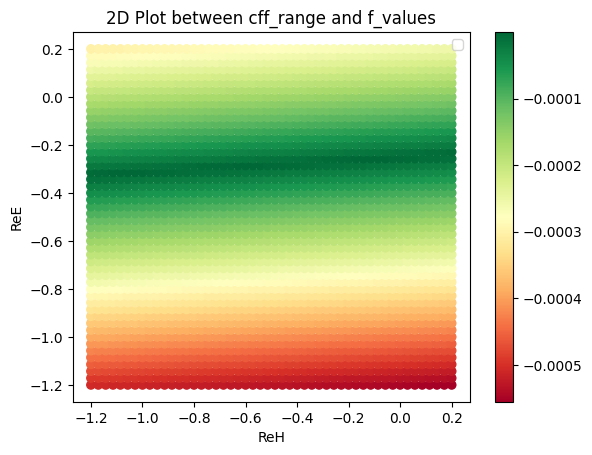

In [99]:
cff_range = np.linspace(-1.2, 0.2, 50)
grid = np.meshgrid(cff_range, cff_range)

reh, ree = grid
reh = reh.flatten()
ree = ree.flatten()

f_valuess = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], -0.396272489, 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 202.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_valuess.append(-1 * abs(0.04728751629591 - f_value))

# Create a scatter plot
sc = plt.scatter(reh, ree, c=f_valuess, cmap = 'RdYlGn')
plt.colorbar(sc)
plt.title('2D Plot between cff_range and f_values')
plt.xlabel('ReH')
plt.ylabel('ReE')
plt.legend()
plt.show()  

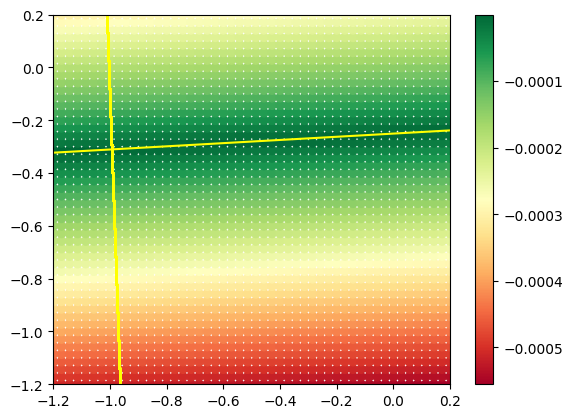

In [133]:
min_indices = np.argsort(np.log(np.array(f_valuess)*-1).flatten())[:10]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i]))

x, y = zip(*coordinates)
m, b = np.polyfit(x, y, 1)

line_y = m * reh + b
plt.plot(reh, line_y, color='yellow')
sc = plt.scatter(reh, ree, c=f_valuess, cmap = 'RdYlGn')

min_indices = np.argsort(np.log(np.array(f_values)*-1).flatten())[:10]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i]))

x, y = zip(*coordinates)
m1, b1 = np.polyfit(x, y, 1)

line_y = m1 * reh + b1
plt.plot(reh, line_y, color='yellow')

plt.colorbar(sc)

plt.xlim(-1.2, 0.2)
plt.ylim(-1.2, 0.2)
plt.show()

In [131]:
def find_intersection(*equations):
    # Create a matrix A and a vector B from the equations
    A = np.array([eq[:-1] for eq in equations])
    B = -np.array([eq[-1] for eq in equations])

    # Solve the system of linear equations
    intersection_point = np.linalg.solve(A, B)

    return tuple(intersection_point)

In [139]:
find_intersection([-m, 1, -b], [-m1, 1, -b1])

(-0.9925160147908962, -0.31023384198739645)

In [ ]:
cff_range = np.linspace(-1.2, 0.2, 25)
grid = np.meshgrid(cff_range, cff_range, cff_range)

reh, ree, reht = grid
reh = reh.flatten()
ree = ree.flatten()
reht = reht.flatten()

f_angle1 = []
f_angle2 = []
f_angle3 = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], reht[i], 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 202.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_angleOne.append(-1 * abs(0.04728751629591 - f_value))